Wavelets are mathematical functions that satisfy certain conditions, making them suitable for analyzing and processing signals at different scales. To be considered a wavelet, a function must meet specific properties, among which the two most fundamental are:

1. **Zero Mean Admissibility Condition (or No Zero Frequency):**
   - This condition ensures that the wavelet has zero average value over its entire domain. It means that the wavelet oscillates such that it effectively integrates to zero. This property allows wavelets to effectively represent data with high localization in both time and frequency domains. The mathematical expression for this condition is:
     $
     \int_{-\infty}^{\infty} \psi(t) \, dt = 0
     $
   where $\psi(t)$ is the wavelet function.

2. **Finite Energy:**
   - A function is said to have finite energy if, when squared and integrated over its entire domain, the result is finite. This property is essential for ensuring that the wavelet can be used in practical signal processing applications, including decomposition and reconstruction of signals without introducing infinite energy. The mathematical expression for this condition, also known as the $L^2$ norm condition, is:
     $
     \int_{-\infty}^{\infty} |\psi(t)|^2 \, dt < \infty
     $
   This means the squared magnitude of the wavelet function, integrated over its entire domain, yields a finite value.


Certainly, different wavelets have their unique forms and properties tailored to specific applications. Let's look at the equations for two commonly used wavelets: the Haar wavelet and the Shannon wavelet.

### 1. Haar Wavelet

The Haar wavelet is one of the simplest wavelet functions and is defined by a piecewise function. It is particularly noted for its simplicity and is used in various digital signal processing applications. The Haar wavelet function, $\psi(t)$, can be defined as:

$
\psi(t) = 
\begin{cases} 
1 & \text{for } 0 \leq t < \frac{1}{2}, \\
-1 & \text{for } \frac{1}{2} \leq t < 1, \\
0 & \text{otherwise}.
\end{cases}
$

### 2. Shannon Wavelet

The Shannon wavelet, also known as the sinc wavelet, is based on the Shannon sampling theorem and is defined using the sine function. It is particularly known for its applications in information theory and signal processing. The Shannon wavelet function, $\psi(t)$, can be expressed as:

$
\psi(t) = \frac{\sin(\pi t) - \sin(2\pi t)}{\pi t}
$

Alternatively, in the frequency domain, the Shannon wavelet can be described as a function that is essentially a band-pass filter, with its support strictly limited to the frequency range $[\frac{1}{2}, 1]$ or equivalently $[-1, -\frac{1}{2}]$ in normalized frequency units. This makes it highly suitable for analyzing signals where band-limited components are of interest.

These wavelets serve different purposes and have unique characteristics that make them suitable for various applications in signal processing, image compression, and data analysis.


Adding to the list of wavelets, let's explore the equations or descriptions for Morlet, Daubechies, Coiflets, Symlets, Gaussian, Meyer, and Mexican Hat wavelets. Each wavelet has unique characteristics that make it suitable for specific applications.

### 3. Morlet Wavelet
The Morlet wavelet, also known as the Gabor wavelet, is a complex sine wave modulated by a Gaussian window. It is widely used in time-frequency analysis. The Morlet wavelet function is given by:
$
\psi(t) = \pi^{-1/4} e^{i\omega_0 t} e^{-t^2/2}
$
where $\omega_0$ is the central frequency of the sine wave.





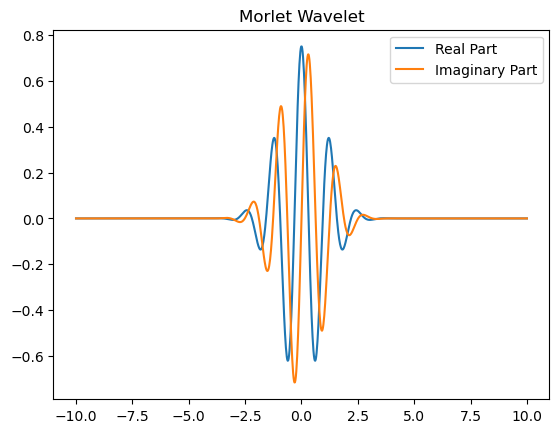

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Morlet Wavelet Function
def morlet_wavelet(t, w0=5):
    return np.pi**(-0.25) * np.exp(1j*w0*t) * np.exp(-t**2 / 2)

# Plot
t = np.linspace(-10, 10, 1000)
plt.plot(t, np.real(morlet_wavelet(t)), label='Real Part')
plt.plot(t, np.imag(morlet_wavelet(t)), label='Imaginary Part')
plt.title('Morlet Wavelet')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


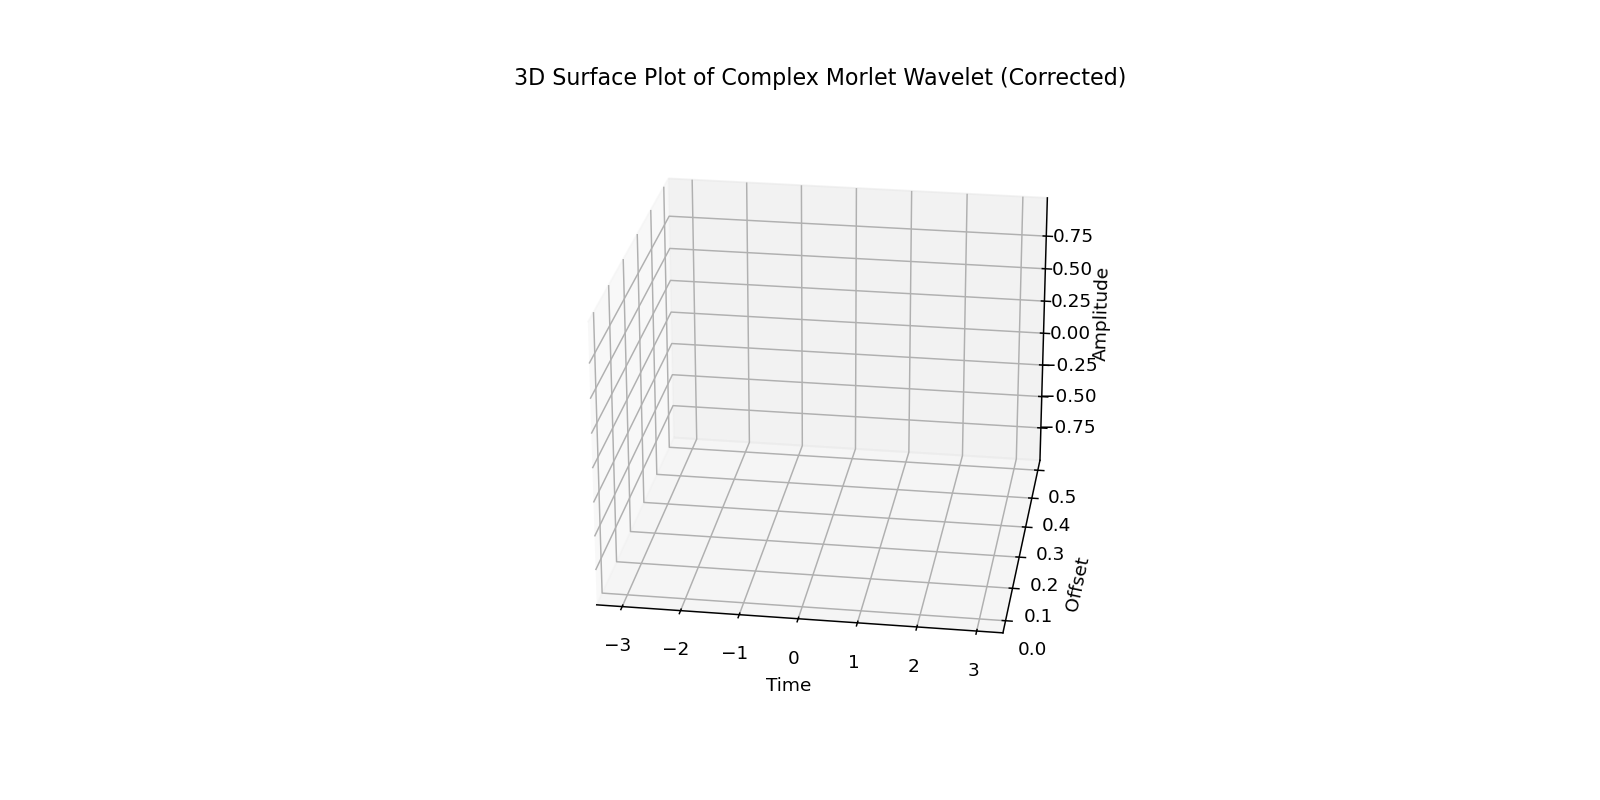

In [21]:
# Correcting the approach for 3D surface plot
def plot_3d_surface_complex_morlet_wavelet_corrected(length=500, w=5, center_frequency=2*np.pi, std_dev=1):
    """
    Create a corrected 3D surface plot of the Complex Morlet Wavelet, showing both real and imaginary parts.
    """
    # Time vector centered at zero
    t = np.linspace(-3, 3, length)
    t_grid, _ = np.meshgrid(t, t)  # Creating a 2D grid for X and Y, but we'll only use X (time)
    
    # Complex Morlet wavelet formula
    wavelet = np.exp(1j * center_frequency * t) * np.exp(-t**2 / (2 * std_dev**2))
    
    # Preparing data for 3D surface plot
    Z_real = np.real(wavelet).reshape(1, -1)  # Real part as a 2D array
    Z_imag = np.imag(wavelet).reshape(1, -1)  # Imaginary part as a 2D array
    Y_real = np.zeros_like(Z_real)  # Y-axis (real part) - flat
    Y_imag = np.ones_like(Z_imag) * 0.5  # Y-axis (imaginary part) - offset for visualization
    
    # 3D plot setup
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Real part surface plot
    ax.plot_surface(t_grid, Y_real, Z_real, alpha=0.7, color='blue', label='Real Part')
    
    # Imaginary part surface plot
    ax.plot_surface(t_grid, Y_imag, Z_imag, alpha=0.7, color='orange', label='Imaginary Part')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Offset')
    ax.set_zlabel('Amplitude')
    ax.set_title('3D Surface Plot of Complex Morlet Wavelet (Corrected)')
    
    # Adjusting the view
    ax.view_init(elev=30, azim=-50)
    
    plt.show()

plot_3d_surface_complex_morlet_wavelet_corrected()


<IPython.core.display.Javascript object>


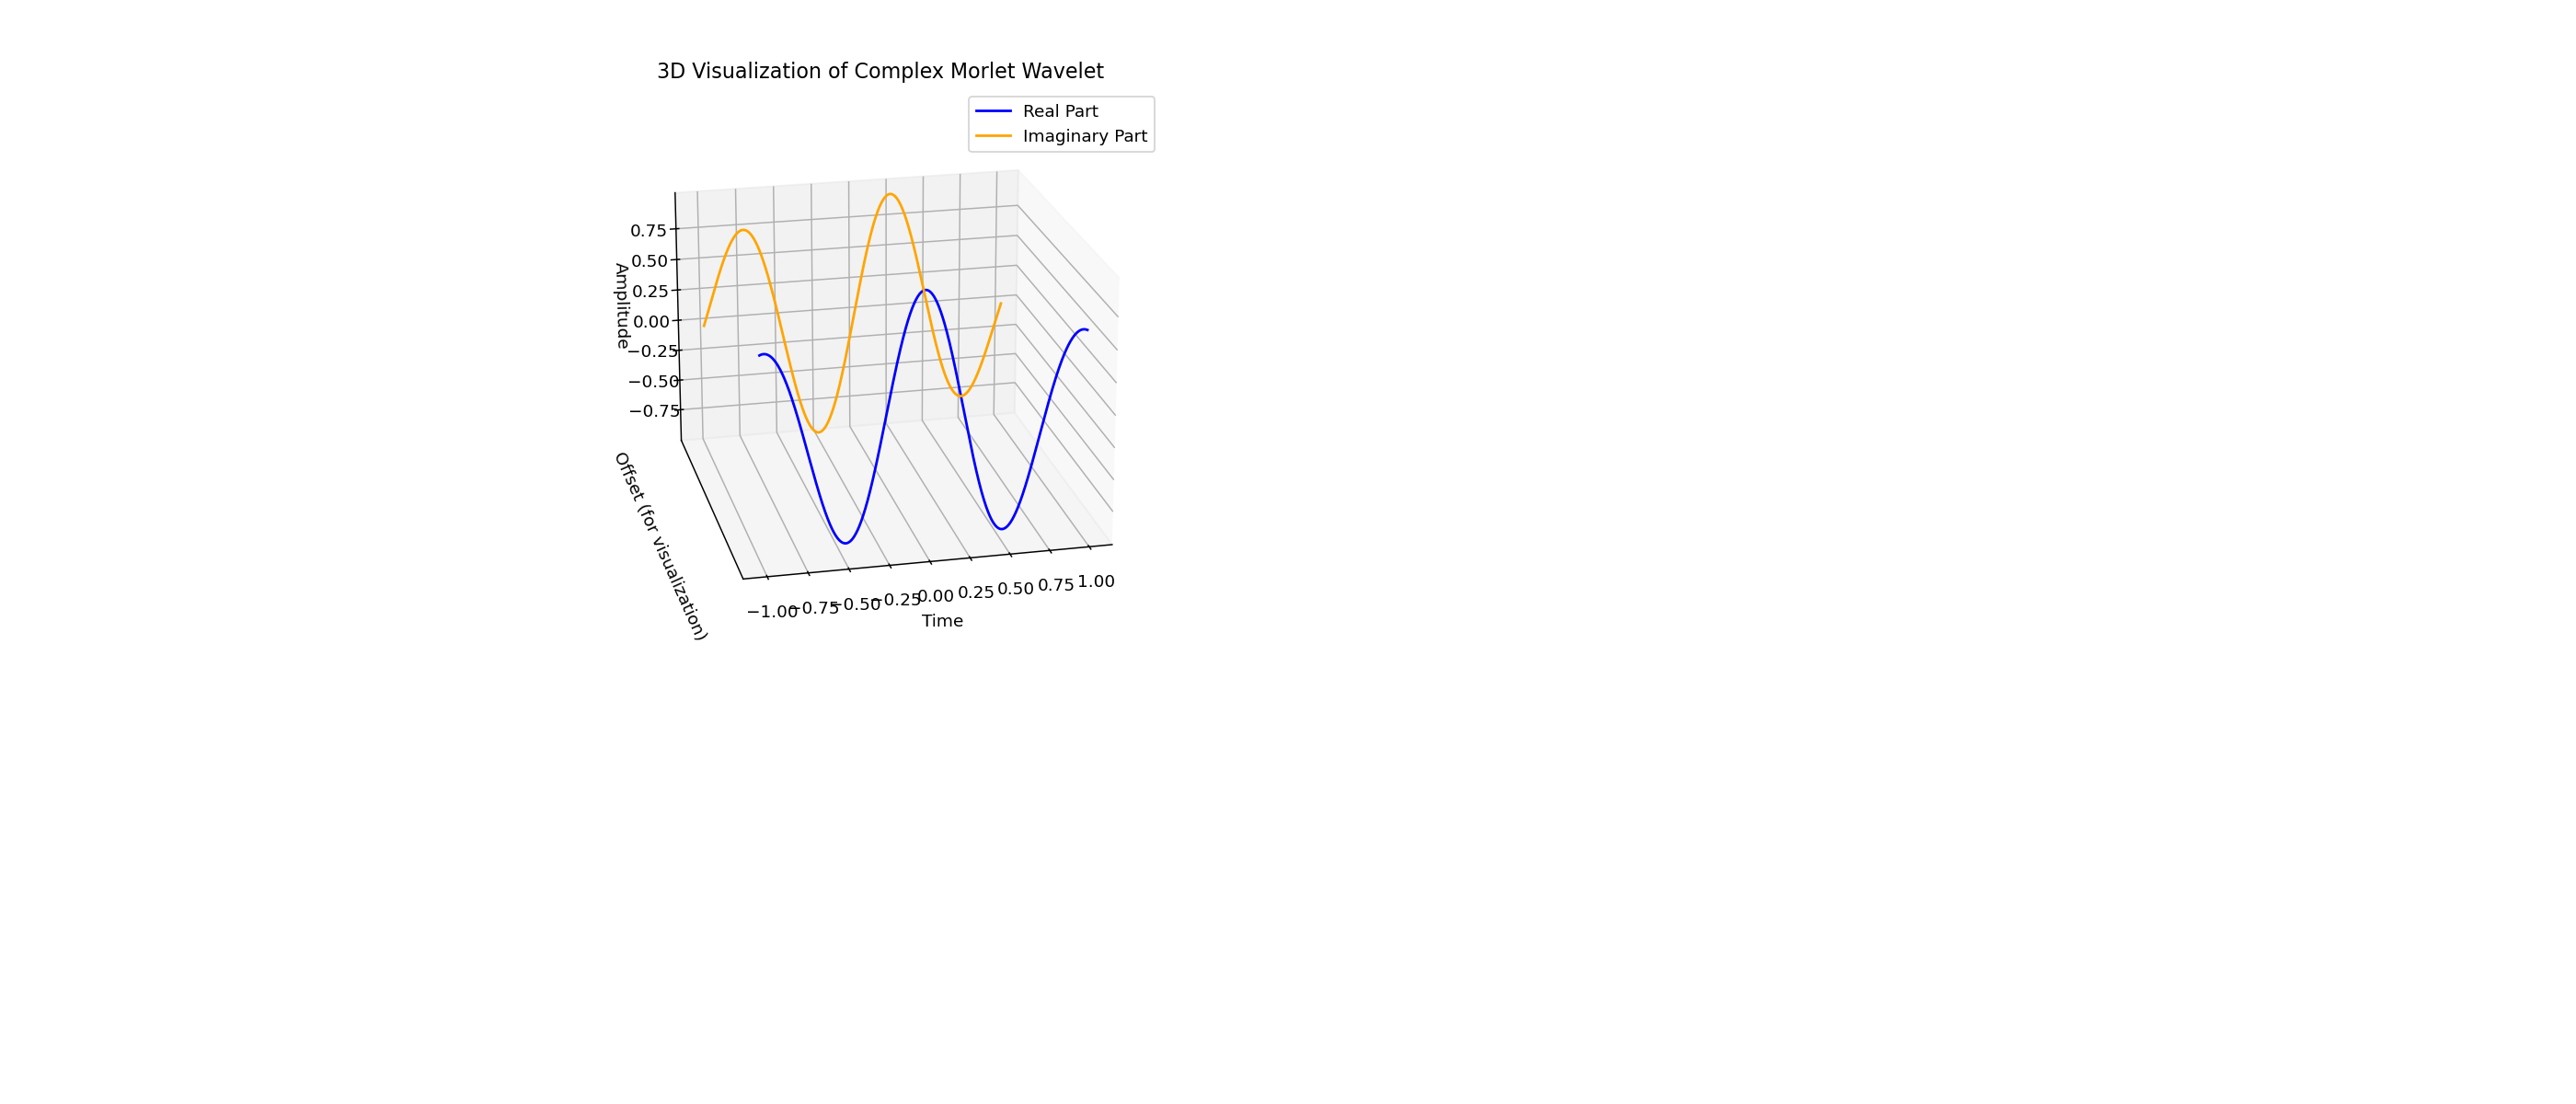

In [22]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_complex_morlet_wavelet(length=1000, w=5, center_frequency=2*np.pi, std_dev=1):
    """
    Create a 3D plot of the Complex Morlet Wavelet, showing both real and imaginary parts.

    Parameters:
    - length: Number of points in the wavelet.
    - w: Wavelet width parameter.
    - center_frequency: Center frequency of the wavelet.
    - std_dev: Standard deviation of the Gaussian window.
    """
    # Time vector centered at zero
    t = np.linspace(-1, 1, length)
    
    # Complex Morlet wavelet formula
    wavelet = np.exp(1j * center_frequency * t) * np.exp(-t**2 / (2 * std_dev**2))
    
    # 3D plot
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Real part
    ax.plot(t, np.zeros_like(t), wavelet.real, label='Real Part', color='blue')
    
    # Imaginary part
    ax.plot(t, np.ones_like(t) * 0.1, wavelet.imag, label='Imaginary Part', color='orange')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Offset (for visualization)')
    ax.set_zlabel('Amplitude')
    ax.set_title('3D Visualization of Complex Morlet Wavelet')
    
    # Customizing the y-axis to hide the offset visually
    ax.set_yticks([])
    ax.legend()

    plt.show()

plot_3d_complex_morlet_wavelet()


<IPython.core.display.Javascript object>


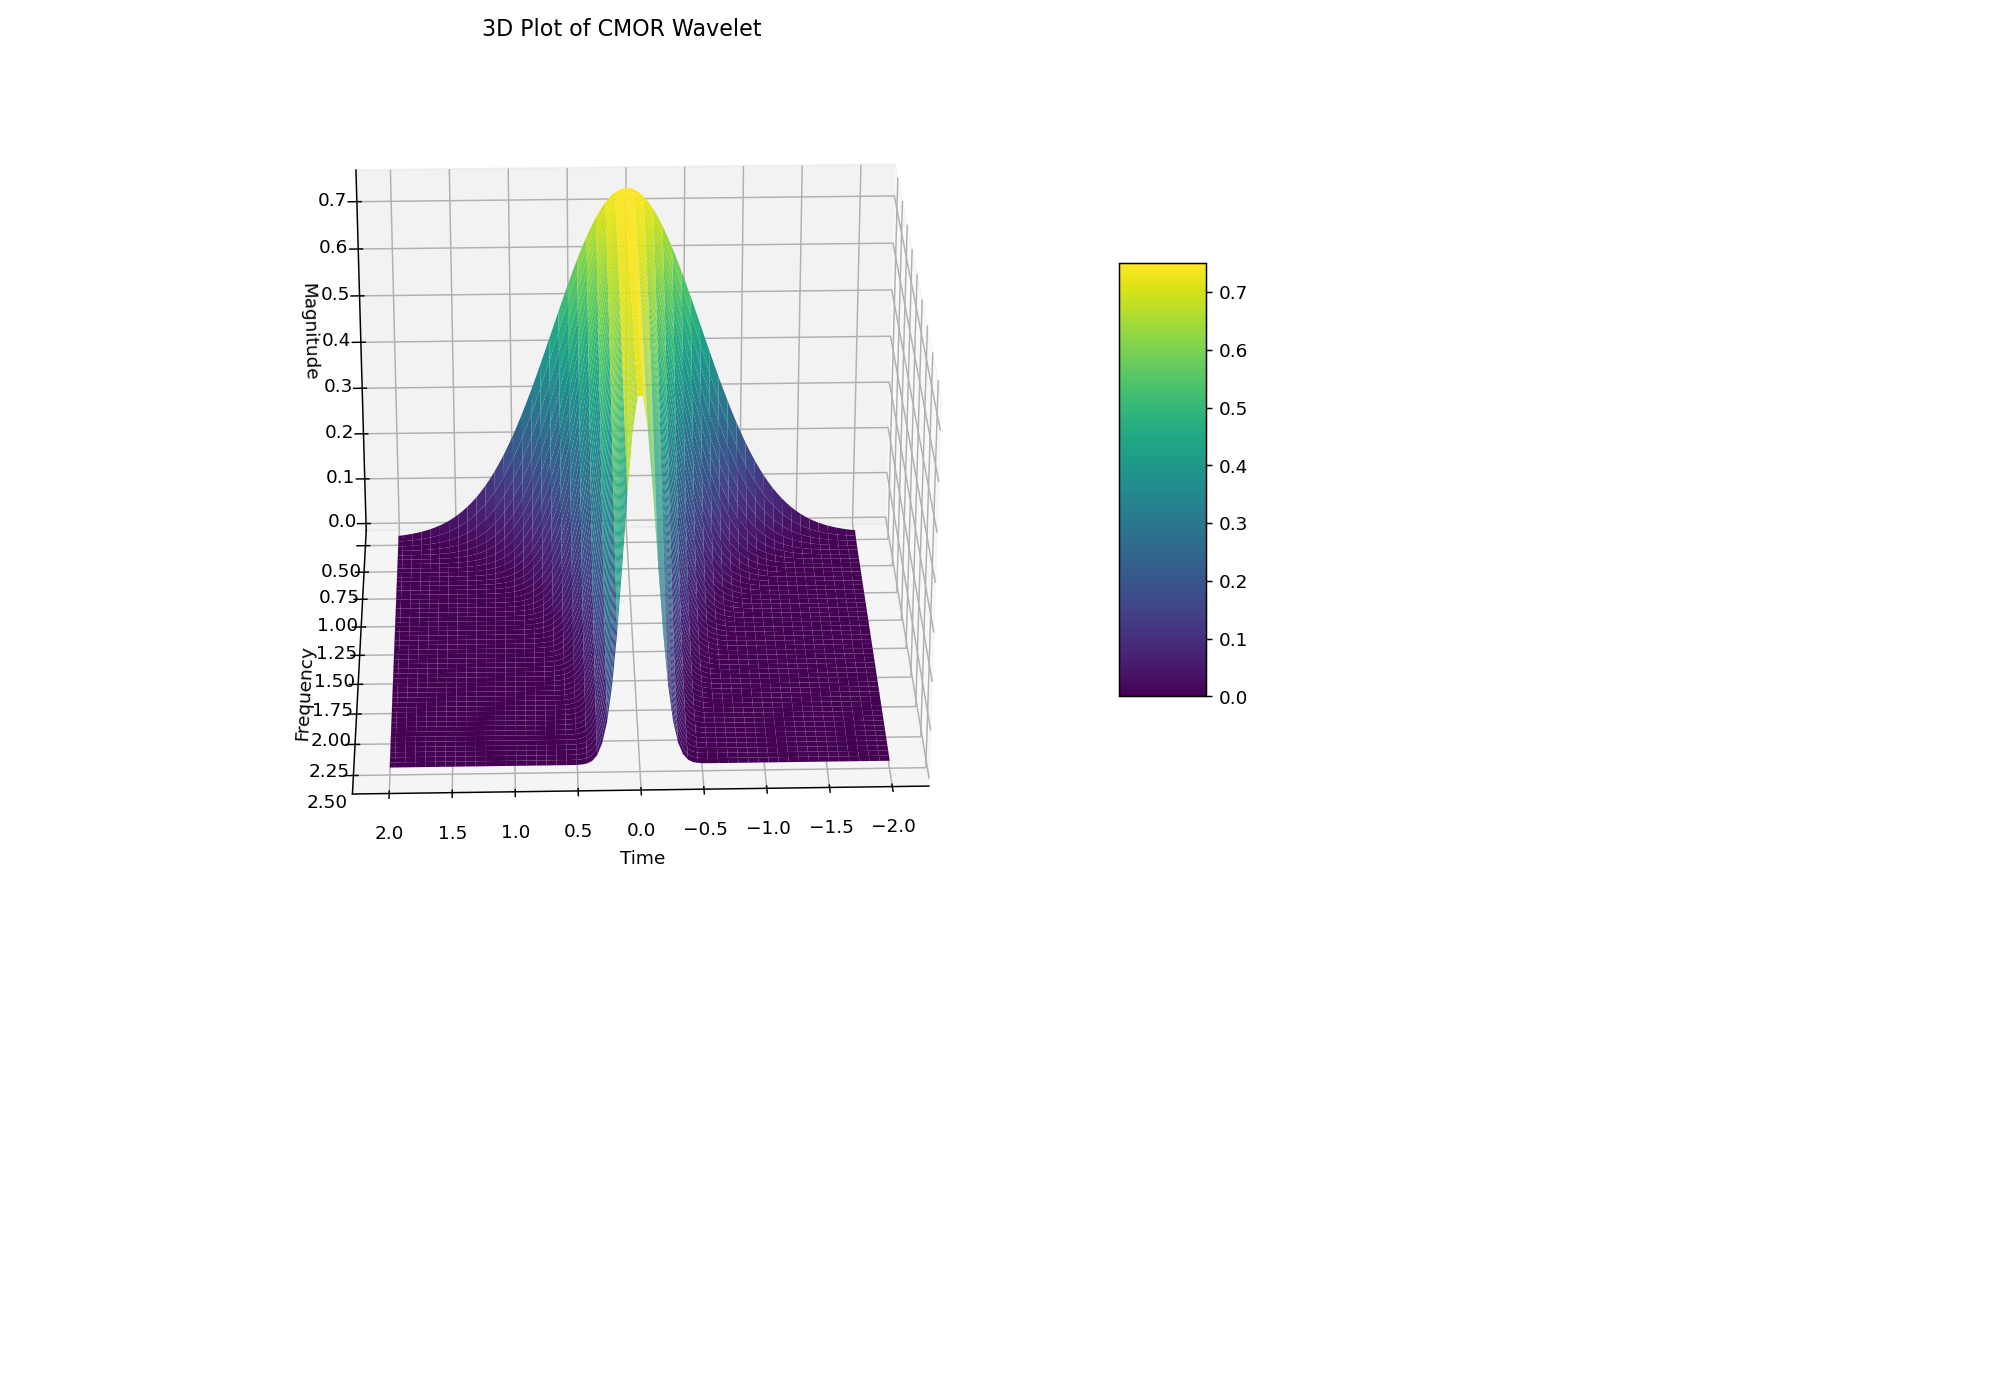

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import morlet

def cmor_wavelet_3d(width=5, s=1, timesteps=100, freqs=50):
    """
    Generate and plot a 3D representation of a CMOR wavelet.

    Parameters:
    - width: Width of the Morlet wavelet.
    - s: Scaling factor for the wavelet.
    - timesteps: Number of time steps for the time domain.
    - freqs: Number of frequency steps for the frequency domain.
    """
    # Time and frequency ranges
    time = np.linspace(-2, 2, timesteps)
    frequencies = np.linspace(0.5, 2.5, freqs)
    
    # Calculate wavelet for each frequency
    wavelets = np.array([morlet(timesteps, w=width, s=s*f, complete=True) for f in frequencies])
    
    # 3D plot
    T, F = np.meshgrid(time, frequencies)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotting the magnitude of the wavelet
    magnitude = np.abs(wavelets)
    surf = ax.plot_surface(T, F, magnitude, cmap='viridis', edgecolor='none')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Magnitude')
    ax.set_title('3D Plot of CMOR Wavelet')
    
    # Adding a color bar for reference
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.tight_layout()
    plt.show()

cmor_wavelet_3d()







### 4. Daubechies Wavelets
Daubechies wavelets, named after Ingrid Daubechies, are a family of orthogonal wavelets defining a discrete wavelet transform and characterized by a maximal number of vanishing moments for some given support. With the notation $D_n$, where $n$ is the order of the wavelet, the explicit equations are complex and constructed algorithmically rather than by simple formulas.


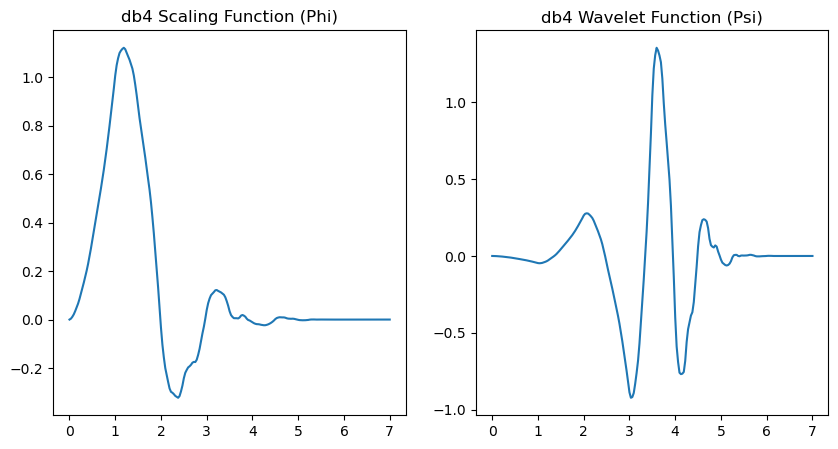

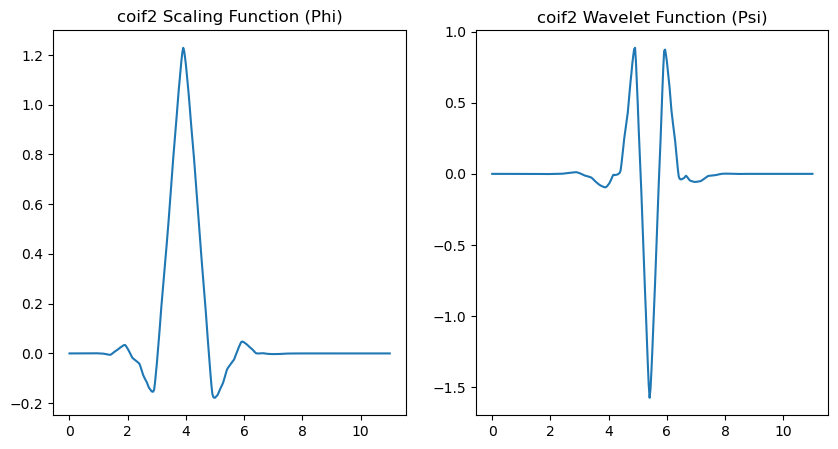

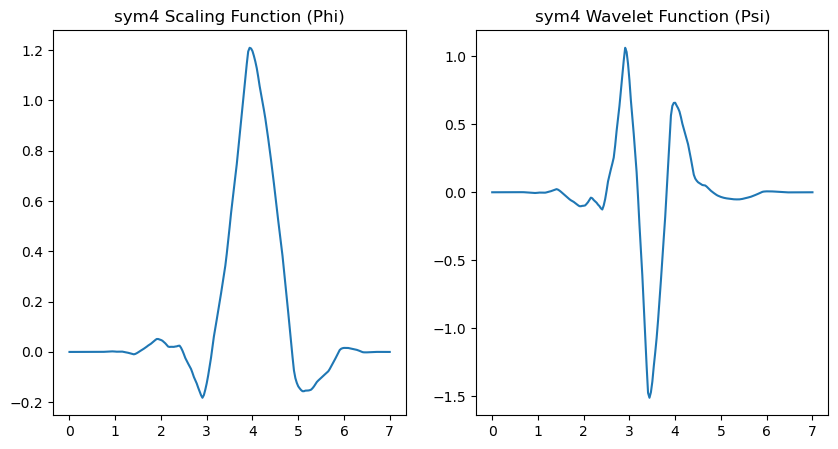

In [5]:
import pywt

# Function to Plot a Wavelet Family
def plot_wavelet_family(wavelet_name, family_member=2, levels=5):
    wavelet = pywt.Wavelet(f'{wavelet_name}{family_member}')
    phi, psi, x = wavelet.wavefun(level=levels)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, phi)
    plt.title(f'{wavelet_name}{family_member} Scaling Function (Phi)')
    plt.subplot(1, 2, 2)
    plt.plot(x, psi)
    plt.title(f'{wavelet_name}{family_member} Wavelet Function (Psi)')
    plt.show()

# Plot Daubechies
plot_wavelet_family('db', family_member=4)

# Plot Coiflets
plot_wavelet_family('coif', family_member=2)

# Plot Symlets
plot_wavelet_family('sym', family_member=4)



### 5. Coiflets
Coiflets are a family of wavelets created by Ingrid Daubechies as a variant of the Daubechies wavelets designed to have both vanishing moments and symmetry. They are particularly useful for signal processing where phase information is important. Like Daubechies wavelets, their explicit forms are derived through an algorithmic process.

### 6. Symlets
Symlets are also a family of wavelets, similar to Daubechies wavelets but with improved symmetry. They are often used in applications requiring a more symmetric wavelet function. Symlets are denoted as $Sym_n$, where $n$ indicates the order, and their construction is also algorithmic.

### 7. Gaussian Wavelets
Gaussian wavelets are derived from the derivatives of the Gaussian function. The $n$th derivative of a Gaussian provides the $n$th order Gaussian wavelet. The general form is not typically expressed in a simple equation due to its derivation process.

### 8. Meyer Wavelet
The Meyer wavelet is a smooth and compactly supported wavelet that is constructed in the frequency domain. It is defined via its Fourier transform and is particularly useful for applications requiring a smooth approximation. The Meyer wavelet involves a somewhat complex construction in the frequency domain, ensuring it meets the admissibility condition.

### 9. Mexican Hat Wavelet
Also known as the Ricker wavelet, the Mexican Hat wavelet is the second derivative of the Gaussian function and is given by:
$
\psi(t) = \frac{2}{\sqrt{3\sigma}\pi^{1/4}} \left(1 - \frac{t^2}{\sigma^2}\right) e^{-t^2/2\sigma^2}
$
where $\sigma$ is the standard deviation of the Gaussian function.

Each of these wavelets has distinct properties and applications, from simple signal processing to complex analysis in various fields like image processing, geophysics, and financial analysis.

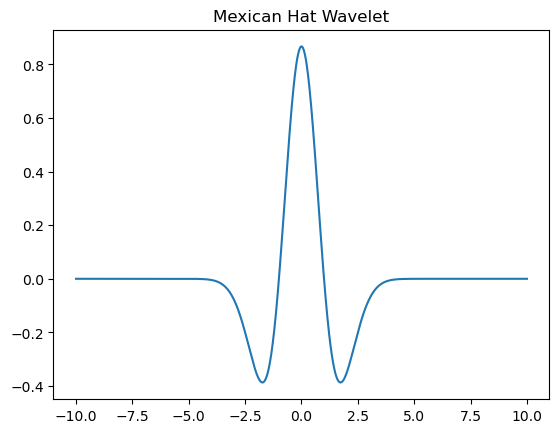

In [3]:
# Mexican Hat Wavelet Function
def mexican_hat_wavelet(t, sigma=1):
    return (2 / (np.sqrt(3*sigma) * np.pi**0.25)) * (1 - (t**2 / sigma**2)) * np.exp(-t**2 / (2*sigma**2))

# Plot
t = np.linspace(-10, 10, 1000)
plt.plot(t, mexican_hat_wavelet(t))
plt.title('Mexican Hat Wavelet')
plt.show()


Scaled and translated wavelets, often referred to in the context of creating "daughter wavelets" from a "mother wavelet," are foundational concepts in wavelet analysis. This approach allows for the detailed analysis of signals at various scales and positions, enabling the examination of both high-frequency components (detail) and low-frequency components (approximation) of a signal.

### Mother Wavelet

The "mother wavelet" is the original wavelet function from which all other wavelets in the analysis can be generated. It serves as a prototype for creating daughter wavelets. The mother wavelet must satisfy certain mathematical conditions, including having a zero mean and finite energy, to ensure it is suitable for signal analysis.

### Daughter Wavelets

Daughter wavelets are generated from the mother wavelet through processes of scaling (dilating or compressing) and translation (shifting). These processes allow the daughter wavelets to analyze the signal at various frequencies and time locations.

- **Scaling**: Scaling a wavelet changes its width, affecting the frequency range it analyzes. Scaling down (making the wavelet narrower) allows for the analysis of higher frequency components, whereas scaling up (making the wavelet wider) focuses on lower frequency components. This is crucial for multi-resolution analysis, where the signal is examined at different levels of detail.
  
- **Translation**: Translation shifts the wavelet along the time axis, enabling the analysis of the signal at different time locations. This allows for the detection of features or patterns within the signal at various points in time.

### Mathematical Representation

The mathematical process of generating daughter wavelets from the mother wavelet $\psi(t)$ is represented by the following equation:

$
\psi_{a,b}(t) = \frac{1}{\sqrt{|a|}} \psi\left(\frac{t-b}{a}\right)
$

where:
- $\psi_{a,b}(t)$ is the daughter wavelet,
- $a$ is the scaling parameter (affecting frequency; $a > 0$, $a \neq 1$),
- $b$ is the translation parameter (affecting time location),
- $t$ is the time variable.

The factor $\frac{1}{\sqrt{|a|}}$ ensures that the wavelet has the same energy at all scales, maintaining the energy of the signal consistent across different levels of analysis.


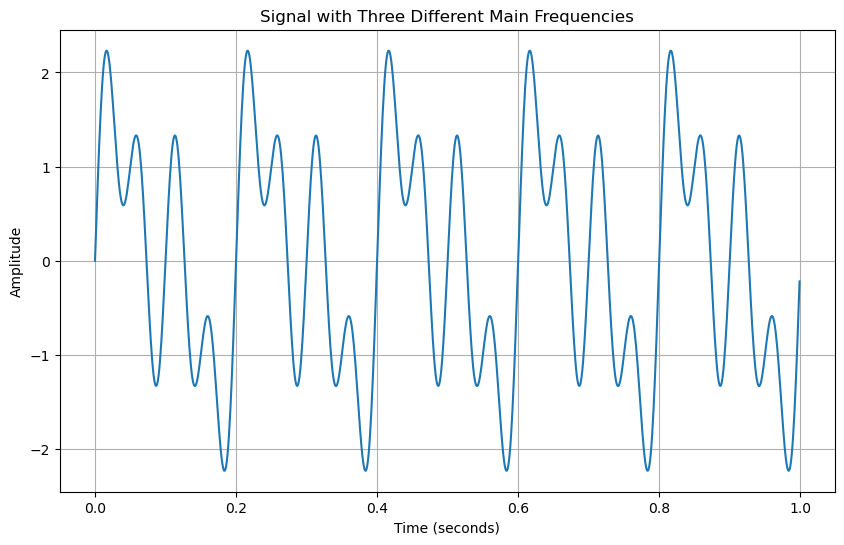

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling rate and time vector
fs = 1000  # Sampling rate in Hz
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second

# Define the frequencies
f1 = 5   # Frequency of the first signal in Hz
f2 = 10  # Frequency of the second signal in Hz
f3 = 20  # Frequency of the third signal in Hz

# Generate the signal
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

# Plotting the signal
plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title('Signal with Three Different Main Frequencies')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


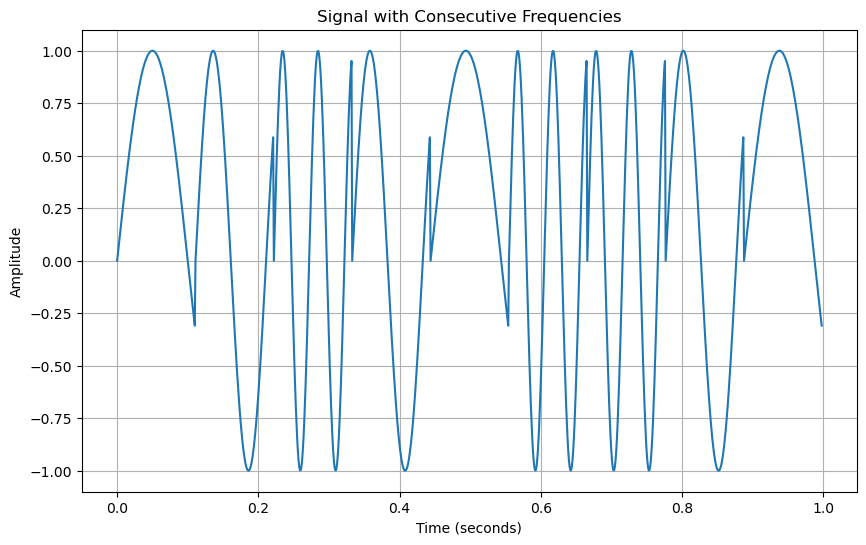

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling rate and total time
fs = 1000  # Sampling rate in Hz
total_time = 1  # Total time in seconds
t = np.arange(0, total_time, 1/fs)  # Time vector

# Define the frequencies
frequencies = [5, 10, 20]

# Calculate the duration for each frequency segment
segment_duration = total_time / 9  # Divide by 9 because we have 3 frequencies in 3 orders
segment_points = int(fs * segment_duration)  # Number of points in each segment

# Initialize the signal
signal = np.array([])

# Generate segments in the specified order and concatenate them
# Order 1: 5 Hz, 10 Hz, 20 Hz
for f in frequencies:
    segment_t = np.arange(0, segment_duration, 1/fs)[:segment_points]  # Time vector for this segment
    segment_signal = np.sin(2 * np.pi * f * segment_t)
    signal = np.concatenate((signal, segment_signal))

# Order 2: 10 Hz, 5 Hz, 20 Hz
for f in [10, 5, 20]:
    segment_t = np.arange(0, segment_duration, 1/fs)[:segment_points]
    segment_signal = np.sin(2 * np.pi * f * segment_t)
    signal = np.concatenate((signal, segment_signal))

# Order 3: 20 Hz, 10 Hz, 5 Hz
for f in [20, 10, 5]:
    segment_t = np.arange(0, segment_duration, 1/fs)[:segment_points]
    segment_signal = np.sin(2 * np.pi * f * segment_t)
    signal = np.concatenate((signal, segment_signal))

# Plotting the signal
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, total_time, 1/fs)[:len(signal)], signal)
plt.title('Signal with Consecutive Frequencies')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Time domain vs frequency domain heisenberg uncertainty principle
<video controls src="vid/1.mp4">animation</video>




<video controls src="vid/2.mp4">animation</video>

# Convolution and Dot Product
<video controls src="vid/3.mp4">animation</video>

<video controls src="vid/4.mp4">animation</video>

<video controls src="vid/5.mp4">animation</video>

<video controls src="vid/6.mp4">animation</video>

<video controls src="vid/7.mp4">animation</video>

<video controls src="vid/8.mp4">animation</video>

<video controls src="vid/9.mp4">animation</video>

<video controls src="vid/10.mp4">animation</video>

<video controls src="vid/11.mp4">animation</video>

<video controls src="vid/12.mp4">animation</video>

[video courtesy](https://www.youtube.com/watch?v=jnxqHcObNK4)

# Wavelet Scalogram

# Heisenberg Box

/home/behnam/anaconda3/envs/PythonTutorial/lib/python3.10/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


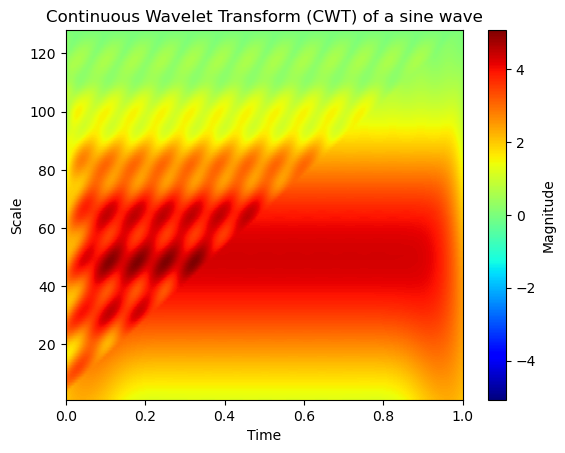

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generating a test signal: a sine wave
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 7 * t)

# Defining the wavelet
wavelet = 'cmor'

# Setting scales
scales = np.arange(1, 128)

# Performing the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, 1/1000)

# Plotting
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 128], cmap='jet', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time')
plt.title('Continuous Wavelet Transform (CWT) of a sine wave')
plt.show()


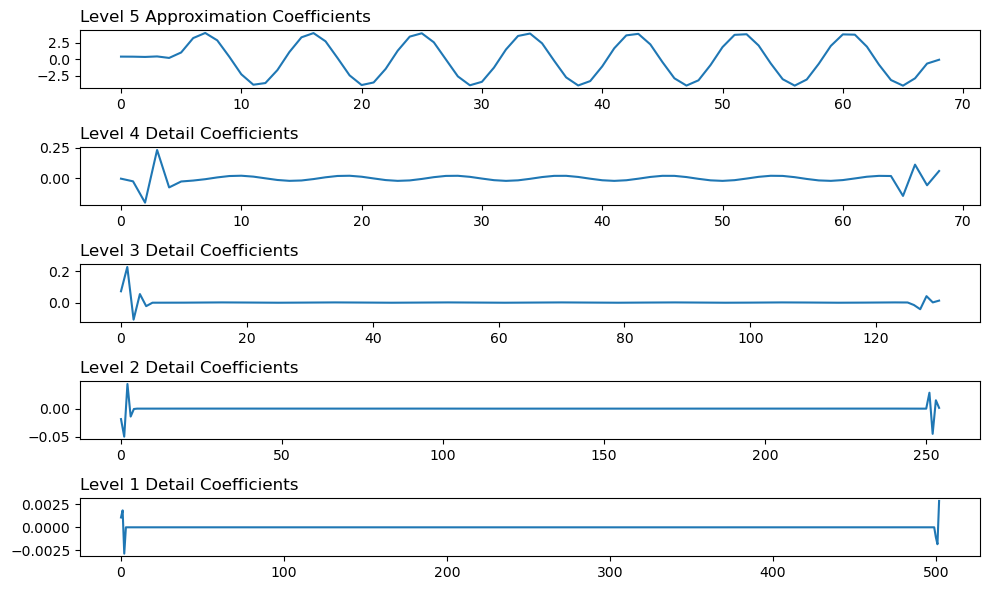

In [17]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generating a test signal: a sine wave
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 7 * t)

# Choosing a wavelet
wavelet = 'db4'  # Daubechies wavelet with 4 vanishing moments

# Performing the Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(signal, wavelet, level=4)

# Plotting the approximation and detail coefficients
plt.figure(figsize=(10, 6))
for i, coeff in enumerate(coeffs):
    levels = len(coeffs) - i
    plt.subplot(len(coeffs), 1, i+1)
    plt.plot(coeff)
    plt.title(f'Level {levels} {"Approximation" if i == 0 else "Detail"} Coefficients', loc='left')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


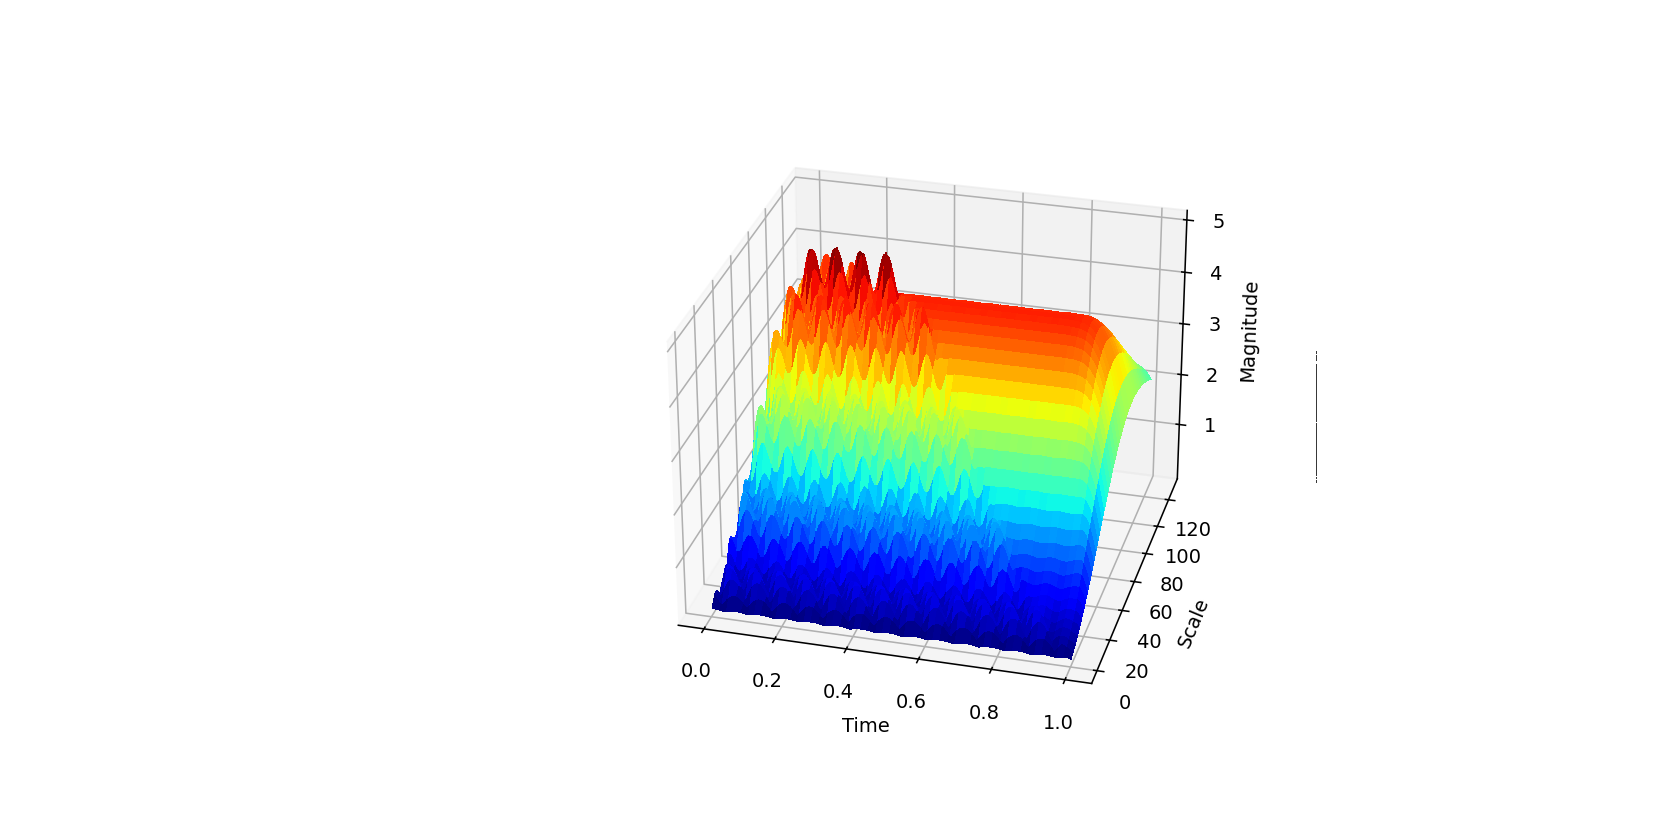

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pywt
%matplotlib notebook


# Generating a test signal: a sine wave
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 7 * t)

# Defining the wavelet
wavelet = 'cmor'

# Setting scales
scales = np.arange(1, 128)

# Performing the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, 1/1000)

# Preparing 3D plot
T, S = np.meshgrid(t, scales)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the scalogram in 3D
surf = ax.plot_surface(T, S, np.abs(coefficients), cmap='jet', linewidth=0, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Scale')
ax.set_zlabel('Magnitude')
ax.set_title('3D Scalogram from Continuous Wavelet Transform')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()
